<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/_ry_Confidence_Interval_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Financial Python
## Confidence Interval and Hypothesis Testing

- Ref: https://www.quantconnect.com/tutorials/introduction-to-financial-python/confidence-interval-and-hypothesis-testing#Confidence-Interval-and-Hypothesis-Testing-Introduction


In [259]:
# https://www.quantconnect.com/tutorials/introduction-to-financial-python/confidence-interval-and-hypothesis-testing#Confidence-Interval-and-Hypothesis-Testing-Introduction


In [260]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

'''
qb = QuantBook()
spy = qb.AddEquity("SPY").Symbol
'''
#get SPY data from August 2010 to the present
'''
start_date = datetime(2010, 8, 1, 0, 0, 0)
end_date = qb.Time
spy_table = qb.History(spy, start_date, end_date, Resolution.Daily)

spy_total = spy_table[['open','close']]
'''
#
# 上面主要是撈資料，原作者用了私有的模組 QuantBook 
# 那個東西我沒有，也暫時不想去網路尋找，因此就自創一段來修補，以便連接....
#
import pandas_datareader as pdr

spy_table= pdr.get_data_yahoo('SPY',start='2010-08')

spy_table
# 【Ctrl m -】


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-08-02,112.940002,111.540001,111.989998,112.760002,188263200.0,91.136963
2010-08-03,112.769997,111.849998,112.480003,112.220001,146657300.0,90.700539
2010-08-04,113.110001,112.160004,112.529999,112.970001,158171700.0,91.306709
2010-08-05,112.910004,112.080002,112.250000,112.849998,140473800.0,91.209724
2010-08-06,112.570000,110.919998,111.739998,112.389999,239728300.0,90.837914
...,...,...,...,...,...,...
2021-06-08,423.209991,420.320007,423.109985,422.279999,47134300.0,422.279999
2021-06-09,423.260010,421.410004,423.179993,421.649994,48436300.0,421.649994
2021-06-10,424.630005,421.549988,422.959991,423.609985,51020100.0,423.609985


In [261]:
 
spy_total= spy_table[['Open','Close']]
spy_total.columns= ['open','close']


In [262]:
# 先喵一下我撈到了啥資料？
# Google: 【spy yahoo finance】
# https://finance.yahoo.com/quote/SPY/chart?p=SPY#eyJpbnRlcnZhbCI6IndlZWsiLCJwZXJpb2RpY2l0eSI6MSwiY2FuZGxlV2lkdGgiOjEsImZsaXBwZWQiOmZhbHNlLCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6ImJhciIsImV4dGVuZGVkIjp0cnVlLCJtYXJrZXRTZXNzaW9ucyI6eyJwcmUiOnRydWUsInBvc3QiOnRydWV9LCJhZ2dyZWdhdGlvblR5cGUiOiJvaGxjIiwiY2hhcnRTY2FsZSI6ImxpbmVhciIsInBhbmVscyI6eyJjaGFydCI6eyJwZXJjZW50IjowLjg4LCJkaXNwbGF5IjoiU1BZIiwiY2hhcnROYW1lIjoiY2hhcnQiLCJpbmRleCI6MCwieUF4aXMiOnsibmFtZSI6ImNoYXJ0IiwicG9zaXRpb24iOm51bGx9LCJ5YXhpc0xIUyI6W10sInlheGlzUkhTIjpbImNoYXJ0Iiwi4oCMdm9sIHVuZHLigIwiXX0sIuKAjHJzaeKAjCAoMjAsQykiOnsicGVyY2VudCI6MC4xMiwiZGlzcGxheSI6IuKAjHJzaeKAjCAoMjAsQykiLCJjaGFydE5hbWUiOiJjaGFydCIsImluZGV4IjoxLCJ5QXhpcyI6eyJuYW1lIjoi4oCMcnNp4oCMICgyMCxDKSIsInBvc2l0aW9uIjpudWxsfSwieWF4aXNMSFMiOltdLCJ5YXhpc1JIUyI6WyLigIxyc2nigIwgKDIwLEMpIl19fSwic2V0U3BhbiI6bnVsbCwibGluZVdpZHRoIjoyLCJzdHJpcGVkQmFja2dyb3VuZCI6dHJ1ZSwiZXZlbnRzIjp0cnVlLCJjb2xvciI6IiM3NjdkODQiLCJzdHJpcGVkQmFja2dyb3VkIjp0cnVlLCJyYW5nZSI6bnVsbCwiZXZlbnRNYXAiOnsiY29ycG9yYXRlIjpbXSwic2lnRGV2Ijp7fX0sImN1c3RvbVJhbmdlIjpudWxsLCJzeW1ib2xzIjpbeyJzeW1ib2wiOiJTUFkiLCJzeW1ib2xPYmplY3QiOnsic3ltYm9sIjoiU1BZIiwicXVvdGVUeXBlIjoiRVRGIiwiZXhjaGFuZ2VUaW1lWm9uZSI6IkFtZXJpY2EvTmV3X1lvcmsifSwicGVyaW9kaWNpdHkiOjEsImludGVydmFsIjoid2VlayIsInNldFNwYW4iOm51bGx9XSwid2lkdGgiOjQsInN0dWRpZXMiOnsi4oCMdm9sIHVuZHLigIwiOnsidHlwZSI6InZvbCB1bmRyIiwiaW5wdXRzIjp7ImlkIjoi4oCMdm9sIHVuZHLigIwiLCJkaXNwbGF5Ijoi4oCMdm9sIHVuZHLigIwifSwib3V0cHV0cyI6eyJVcCBWb2x1bWUiOiIjMDBiMDYxIiwiRG93biBWb2x1bWUiOiIjZmYzMzNhIn0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7IndpZHRoRmFjdG9yIjowLjQ1LCJjaGFydE5hbWUiOiJjaGFydCIsInBhbmVsTmFtZSI6ImNoYXJ0In19LCLigIx2b2wgcHJvZmlsZeKAjCI6eyJ0eXBlIjoidm9sIHByb2ZpbGUiLCJpbnB1dHMiOnsiaWQiOiLigIx2b2wgcHJvZmlsZeKAjCIsImRpc3BsYXkiOiLigIx2b2wgcHJvZmlsZeKAjCJ9LCJvdXRwdXRzIjp7IkJhcnMgQ29sb3IiOiIjYjY0YTk2In0sInBhbmVsIjoiY2hhcnQiLCJwYXJhbWV0ZXJzIjp7ImRpc3BsYXlCb3JkZXIiOnRydWUsImRpc3BsYXlWb2x1bWUiOmZhbHNlLCJudW1iZXJPZkJhcnMiOjMwLCJ3aWR0aFBlcmNlbnRhZ2UiOjAuMjUsImNoYXJ0TmFtZSI6ImNoYXJ0IiwicGFuZWxOYW1lIjoiY2hhcnQifX0sIuKAjHJzaeKAjCAoMjAsQykiOnsidHlwZSI6InJzaSIsImlucHV0cyI6eyJQZXJpb2QiOiIyMCIsIkZpZWxkIjoiQ2xvc2UiLCJpZCI6IuKAjHJzaeKAjCAoMjAsQykiLCJkaXNwbGF5Ijoi4oCMcnNp4oCMICgyMCxDKSJ9LCJvdXRwdXRzIjp7IlJTSSI6IiNhZDZlZmYifSwicGFuZWwiOiLigIxyc2nigIwgKDIwLEMpIiwicGFyYW1ldGVycyI6eyJzdHVkeU92ZXJab25lc0VuYWJsZWQiOnRydWUsInN0dWR5T3ZlckJvdWdodFZhbHVlIjoiNTAiLCJzdHVkeU92ZXJCb3VnaHRDb2xvciI6IiM3OWY0YmQiLCJzdHVkeU92ZXJTb2xkVmFsdWUiOiI1MCIsInN0dWR5T3ZlclNvbGRDb2xvciI6IiNmZjgwODQiLCJjaGFydE5hbWUiOiJjaGFydCIsInBhbmVsTmFtZSI6IuKAjHJzaeKAjCAoMjAsQykifX19fQ--

spy_total


,open,close
Date,,
2010-08-02,111.989998,112.760002
2010-08-03,112.480003,112.220001
2010-08-04,112.529999,112.970001
2010-08-05,112.250000,112.849998
2010-08-06,111.739998,112.389999
...,...,...
2021-06-08,423.109985,422.279999
2021-06-09,423.179993,421.649994
2021-06-10,422.959991,423.609985


In [263]:
#calculate log returns
X= spy_log_return = np.log(spy_total.close).diff().dropna()
X


Date
2010-08-03   -0.004800
2010-08-04    0.006661
2010-08-05   -0.001063
2010-08-06   -0.004085
2010-08-09    0.005324
                ...   
2021-06-08    0.000213
2021-06-09   -0.001493
2021-06-10    0.004638
2021-06-11    0.001651
2021-06-14    0.002236
Name: close, Length: 2735, dtype: float64

In [264]:



print('Population mean:', np.mean(spy_log_return))
#[out]: Population mean: 0.000443353825615
print('Population standard deviation:',np.std(spy_log_return))
#[out]: Population standard deviation: 0.00784267293815



Population mean: 0.00048535249884885
Population standard deviation: 0.01075169962667365


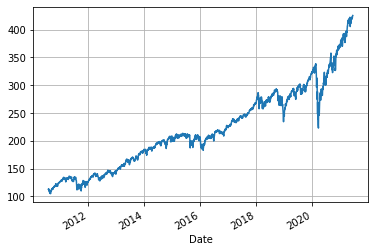

In [265]:
# 原作者只用到 上面 Dataframe 的 'close' 這個欄 (column)
X= spy_total.close 
# 或者
X= spy_total['close']
X
X.plot(grid=True)

#【esc】【b】

In [266]:
X


Date
2010-08-02    112.760002
2010-08-03    112.220001
2010-08-04    112.970001
2010-08-05    112.849998
2010-08-06    112.389999
                 ...    
2021-06-08    422.279999
2021-06-09    421.649994
2021-06-10    423.609985
2021-06-11    424.309998
2021-06-14    425.260010
Name: close, Length: 2736, dtype: float64

In [267]:

Y= np.log2(X).diff().dropna()
Y

Date
2010-08-03   -0.006926
2010-08-04    0.009610
2010-08-05   -0.001533
2010-08-06   -0.005893
2010-08-09    0.007681
                ...   
2021-06-08    0.000308
2021-06-09   -0.002154
2021-06-10    0.006691
2021-06-11    0.002382
2021-06-14    0.003227
Name: close, Length: 2735, dtype: float64

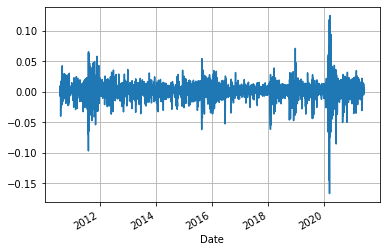

In [268]:
Y.plot(grid=True)

In [269]:
Y.describe()


count    2735.000000
mean        0.000700
std         0.015514
min        -0.167189
25%        -0.005010
50%         0.000918
75%         0.007802
max         0.125126
Name: close, dtype: float64

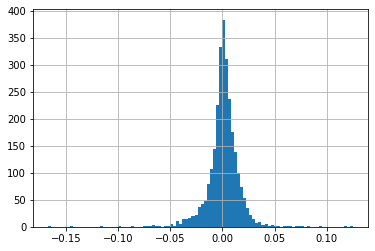

In [270]:
Y.hist(bins=100)

In [271]:
mu= Y.mean()
sigma= Y.std(ddof=1)
n= Y.size
SE= sigma / n**.5
SE



0.00029665550145506855

In [272]:
st.sem(Y)


0.00029665550145506876

In [273]:
信心區間95= (mu-1.96*SE, mu+1.96*SE)
信心區間95

(0.0001187708603203676, 0.0012816604260242363)

In [274]:
# +- 1.96 怎麼來的？
import scipy.stats as st
中間面積CL1= 1-2*st.norm.cdf(-1) # 0.6827
中間面積CL2= 1-2*st.norm.cdf(-2) # 0.9545
中間面積CL3= 1-2*st.norm.cdf(-3) # 中間面積=CL=.9973
中間面積CL1, 中間面積CL2, 中間面積CL3

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

In [275]:

st.norm.ppf((1-0.95)/2)


-1.959963984540054

In [276]:
# 若非 標準型 normal distribution, 95% ==> ? 橫坐標？
st.t.ppf((1-0.95)/2, df=10000)

-1.960201239890626

In [277]:
st.t.ppf((1-0.95)/2, df=10)

-2.2281388519649385

In [278]:
st.t.ppf((1-0.95)/2, df=100)


-1.9839715184496334

In [279]:
# 休息到 11: 20


In [291]:
st.t.interval(.95,df=Y.size-1, loc=Y.mean(), scale=Y.std()/(Y.size**.5))

(0.00011852402670257446, 0.0012819072596420293)

In [292]:
st.t.interval(.90,df=Y.size-1, loc=Y.mean(), scale=Y.std()/(Y.size**.5))

(0.0002120953711205911, 0.0011883359152240125)

In [293]:
Y.mean()

0.0007002156431723019

In [295]:
Y.std()

0.015514260236847635

In [303]:
np.random.seed(0)
Y100= Y.sample(n=100)
Y100

Date
2014-02-04    0.010070
2020-01-17    0.004483
2013-08-06   -0.008221
2010-11-10    0.005801
2020-08-18    0.003113
                ...   
2018-12-04   -0.047521
2020-05-20    0.024303
2011-10-04    0.031287
2016-09-07   -0.000132
2014-09-02   -0.000719
Name: close, Length: 100, dtype: float64

In [305]:
Y.mean(), Y100.mean()

(0.0007002156431723019, 0.0002086185348690961)

In [322]:
x1,x2= st.t.interval(.95, df=Y100.size-1, loc=Y100.mean(), scale=st.sem(Y100))
x1,x2

(-0.0025655285931021187, 0.0029827656628403105)

In [325]:
st.ttest_1samp(Y100, x1) # reject "mu0==x1"，因為 pvalue=0.05 夠小

Ttest_1sampResult(statistic=1.9842169515086827, pvalue=0.05000000000880278)

In [326]:
e= .00001

st.ttest_1samp(Y100, x1-e) # also reject "mu0=x1-e < x1", 因為 pvalue=0.049 更小

Ttest_1sampResult(statistic=1.9913694811330211, pvalue=0.04919560562161689)

In [328]:
st.ttest_1samp(Y100, x1+e) # do not reject "mu0=x1+e > x1"，因為 pvalue=0.0508 不夠小

Ttest_1sampResult(statistic=1.9770644218843447, pvalue=0.05081556152089328)

In [280]:
print('10 days sample returns:', np.mean(spy_log_return.tail(10)))
#[out]: 10 days sample returns: 0.000845189915474
print('10 days sample standard deviation:', np.std(spy_log_return.tail(10)))
#[out]: 10 days sample standard deviation: 0.00313558001122
print('1000 days sample returns:', np.mean(spy_log_return.tail(1000)))
#[out]: 1000 days sample returns: 0.000462827047221
print('1000 days sample standard deviation:', np.std(spy_log_return.tail(1000)))
#[out]: 1000 days sample standard deviation: 0.00766589174299

10 days sample returns: 0.0012350804361541457
10 days sample standard deviation: 0.003422828669076326
1000 days sample returns: 0.0005602979943605533
1000 days sample standard deviation: 0.013036113231790701


In [281]:
#apply the formula above to calculate confidence interval
bottom_1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
upper_1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
bottom_2 = np.mean(spy_log_return.tail(1000))-1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
upper_2 = np.mean(spy_log_return.tail(1000))+1.96*np.std(spy_log_return.tail(1000))/(np.sqrt(len((spy_log_return.tail(1000)))))
#print the outcomes
print('10 days 95% confidence inverval:', (bottom_1,upper_1))
#[out]: 10 days 95% confidence inverval: (-0.0010982627102681939, 0.002788642541217079)
print('1000 days 95% confidence inverval:', (bottom_2,upper_2))
#[out]: 1000 days 95% confidence inverval: (-1.230984558013321e-05, 0.00093796394002165957)


10 days 95% confidence inverval: (-0.0008864107522674248, 0.0033565716245757163)
1000 days 95% confidence inverval: (-0.00024768867474646284, 0.0013682846634675695)


In [282]:
mean_1000 = np.mean(spy_log_return.tail(1000))
std_1000 = np.std(spy_log_return.tail(1000))
mean_10 = np.mean(spy_log_return.tail(10))
std_10 = np.std(spy_log_return.tail(10))
s = pd.Series([mean_10,std_10,mean_1000,std_1000],index = ['mean_10', 'std_10','mean_1000','std_1000'])
print(s)

'''
[out]: mean_10      0.000845
       std_10       0.003136
       mean_1000    0.000463
       std_1000     0.007666
'''


mean_10      0.001235
std_10       0.003423
mean_1000    0.000560
std_1000     0.013036
dtype: float64


'\n[out]: mean_10      0.000845\n       std_10       0.003136\n       mean_1000    0.000463\n       std_1000     0.007666\n'

In [283]:
bottom = 0 - 1.64*std_1000/np.sqrt(1000)
upper = 0 + 1.64*std_1000/np.sqrt(1000)
print((bottom, upper))

#[out]: (-0.00039756352254768874, 0.00039756352254768874)


(-0.0006760704782324012, 0.0006760704782324012)


In [284]:
bottom = 0 - 1.96*std_1000/np.sqrt(1000)
upper = 0 + 1.96*std_1000/np.sqrt(1000)
print((bottom, upper))

#[out]: (-0.00047513689280089639, 0.00047513689280089639)


(-0.0008079866691070161, 0.0008079866691070161)


In [285]:
print(np.sqrt(1000)*(mean_1000 - 0)/std_1000)

#[out]: 1.90922032428


1.3591611234878334


In [286]:
import scipy.stats as st
print((1 - st.norm.cdf(1.9488)))

#[out]: 0.025659656888


0.02565965688799665


In [287]:
mean_1200 = np.mean(spy_log_return.tail(1200))
std_1200 = np.std(spy_log_return.tail(1200))
z_score = np.sqrt(1200)*(mean_1200 - 0)/std_1200
print('z-score = ',z_score)
#[out]: z-score =  2.19793023185
p_value = (1 - st.norm.cdf(z_score))
print('p_value = ',p_value)
#[out]: p_value =  0.0139770390655


z-score =  1.582371281814201
p_value =  0.05678241835411302


# Summary

- In this chapter we introduced confidence interval, especially that for the normal distribution, and hypothesis test. Now we know how to test our idea rigorously. Normal distribution and it's confidence interval can be applied to many quantitative finance theories, we will see it frequently in our following tutorials.

# Ref:
- 
https://www.quantconnect.com/tutorials/introduction-to-financial-python/confidence-interval-and-hypothesis-testing#Confidence-Interval-and-Hypothesis-Testing-Introduction
